# IMPORTING REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOADING DATASET

In [31]:
# Load your athlete dataset
athleteData = pd.read_csv("athlete_events_with_region.csv")
athleteData.head(3)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


# Understand The Dataset

This dataset provides historical information about the modern Olympic Games, covering all the Games from Athens 1896 to Rio 2016. The data was collected from www.sports-reference.com in May 2018 and includes details on individual athletes participating in Olympic events.

The dataset consists of 271,116 rows and 17 columns, each representing an athlete's participation in a specific Olympic event. Here's a breakdown of the columns:


**ID:** A unique identifier for each athlete.<br>
**Name:** The full name of the athlete.<br>
**Sex:** Gender of the athlete (M for male, F for female).<br>
**Age:** Age of the athlete as an integer.<br>
**Height:** The athlete's height in centimeters.<br>
**Weight:** The athlete's weight in kilograms.<br>
**Team:** The name of the team or national delegation.<br>
**NOC:** A 3-letter code representing the National Olympic Committee.<br>
**Games:** The year and season of the Olympic Games.<br>
**Year:** The year of the Olympic Games.<br>
**Season:** Indicates whether it was a Summer or Winter Games.<br>
**City:** The host city of the Olympic Games.<br>
**Sport:** The specific sport or discipline in which the athlete participated.<br>
**Event:** The particular event or competition within the sport.<br>
**Medal:** Denotes the type of medal won by the athlete (Gold, Silver, Bronze) or 'NA' for no medal.<br>
**region:** Complete form of NOC<br>
**notes:** Detailings of Regions<br><br>

It's important to note that up to 1992, both Winter and Summer Games were held in the same year. After that, they were staggered, with Winter Games occurring in one year and Summer Games in the following year. This dataset provides a valuable resource for analyzing the history of Olympic events and athlete performances.






# 1- VISUALIZATION USING LINEPLOT

**LINEPLOT**<br>
A line plot is a type of graph that displays data points as individual markers and connects these points with lines to show how the data changes over a continuous interval, such as time. In a line plot, the x-axis typically represents the continuous variable (e.g., time), and the y-axis represents the value of interest.
Line plots are commonly used to visualize and analyze trends, changes, or patterns over time. 

**Function's Purpose and Line Plot:**<br>
The function plot_medal_count_by_region_over_years uses a line plot to display the distribution of Olympic medals (Gold, Silver, Bronze) by region over multiple years.The primary reason for using a line plot in this case is to visualize and compare the temporal trends in medal counts for various regions. It helps in understanding how their performance has changed over time.
By using a line plot, the function enables a clear and effective representation of how these three regions have fared in the Olympics over the years.

**Insights and Sample Run:**<br>
A sample run using the regions Netherlands, Russia, and Germany reveals that Russia had an unusually large number of medals in the year 1980. This insight might not have been immediately apparent without the line plot.
The line plot allows you to see a spike in Russia's performance in 1980, indicating a remarkable year for the country in terms of Olympic success.

In [36]:
def plot_medal_count_by_region_over_years(athleteData, regions):
    """
    Plot the number of medals by region over the years.

    Args:
        athleteData (pd.DataFrame): The Olympic athlete dataset.
        regions (list of str): List of region names to include in the plot.

    Returns:
        None (displays the line plot).
    """
    # Filter the data to include only rows with medalists (Gold, Silver, Bronze)
    medalists = athleteData[athleteData['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

    # Group the data by region and year, and count the occurrences of each medal type
    medal_counts_by_region = medalists.groupby(['Year', 'region', 'Medal'])['ID'].count().unstack().fillna(0)

    # Calculate the total number of medals (Gold, Silver, Bronze) for each region in each year
    medal_counts_by_region['Total Medals'] = medal_counts_by_region.sum(axis=1)

    # Create a line plot for each region in the regions list
    plt.figure(figsize=(18, 6))

    for region in regions:
        if region in medal_counts_by_region.index.get_level_values('region'):
            region_medals = medal_counts_by_region[medal_counts_by_region.index.get_level_values('region') == region]
            plt.plot(region_medals.index.get_level_values('Year'), region_medals['Total Medals'], label=region)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Medals')
    plt.title('Medal Count by Region Over the Years')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()



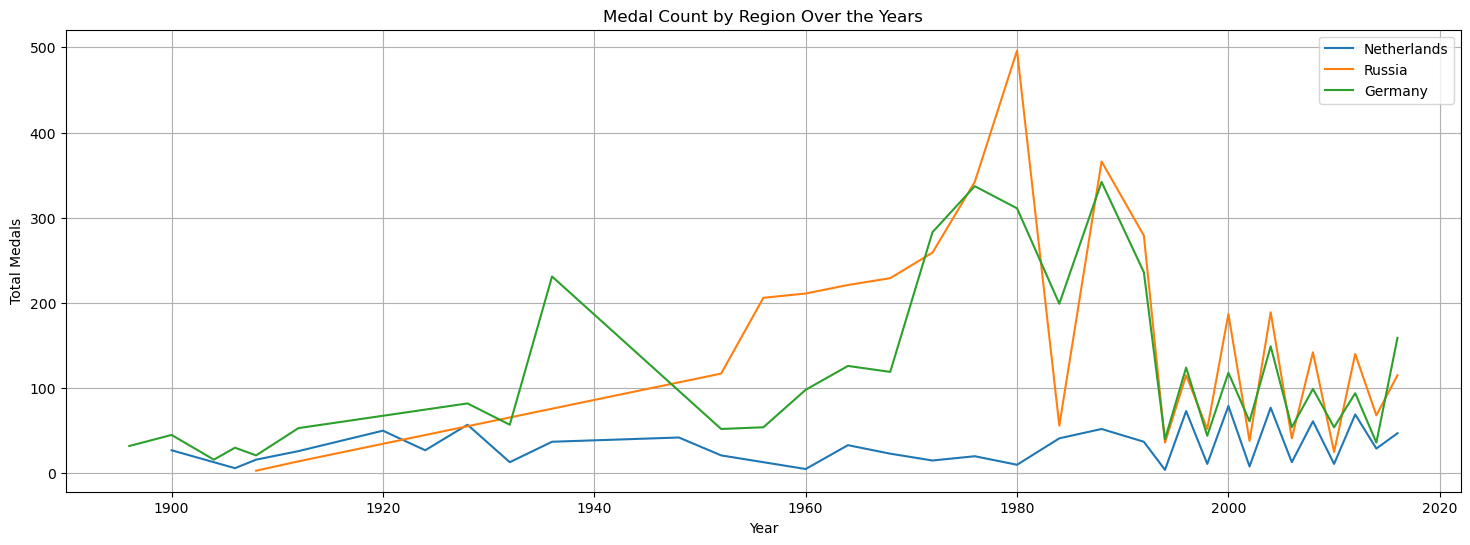

In [37]:
# List of region names to include in the plot
regions_to_plot = ['Netherlands', 'Russia', 'Germany']

# Call the function to plot medal count by region over years
plot_medal_count_by_region_over_years(athleteData, regions_to_plot)


# 2- Visualization through stacked bar plot

**Stacked Bar Plot:**<br>
A stacked bar plot is a type of chart that represents data using rectangular bars. Each bar is divided into segments, with each segment representing a different category or sub-component of the data. The height of each segment corresponds to the quantity or proportion of that category within the whole.
Stacked bar plots are commonly used to display the composition of a whole in terms of its components.

**Function's Purpose and Stacked Bar Plot:**<br>
The function plot_medal_distribution_by_country_region employs a stacked bar plot to visualize the distribution of gold, silver, and bronze medals by country region.
It focuses on the top N country regions (e.g., top 10) with the most total medals to provide a clear overview of how medals are distributed among these regions.
The primary reason for using a stacked bar plot in this case is to illustrate the relative contributions of each type of medal (Gold, Silver, Bronze) within each top country region. It helps in understanding the medal distribution within the selected regions.
By using a stacked bar plot, the function effectively conveys the composition of medals by type for the chosen country regions.

**Insights and Sample Run:**<br>
A sample run using the top 10 countries reveals that the USA has the most medal wins in terms of Gold, Silver, and Bronze combined. This insight is quickly discerned through the stacked bar plot.
The stacked bar plot clearly shows the proportional distribution of medal types for each of the top regions, making it easy to identify the region with the highest overall medal count.
In this case, the visualization highlights that the USA has been highly successful across all types of Olympic medals.

In [32]:
def plot_medal_distribution_by_country_region(athleteData, top_n=10):
    """
    Plot the distribution of gold, silver, and bronze medals by country region.

    Args:
        athleteData (pd.DataFrame): The Olympic athlete dataset with region information.
        top_n (int): The number of top country regions to include in the plot.

    Returns:
        None (displays the stacked bar plot).
    """
    # Filter the data to include only rows with medalists (gold, silver, bronze)
    medalists = athleteData[athleteData['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

    # Group the data by country region and medal type, and count the occurrences
    medal_counts = medalists.groupby(['region', 'Medal']).size().unstack().fillna(0)

    # Select the top N country regions with the most total medals
    top_regions = medal_counts.sum(axis=1).sort_values(ascending=False).head(top_n).index

    # Filter the data to include only the top country regions
    top_medal_counts = medal_counts.loc[top_regions]

    # Create a stacked bar plot with a color theme
    ax = top_medal_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

    # Set labels and title
    ax.set_xlabel('Country Region')
    ax.set_ylabel('Number of Medals')
    ax.set_title('Medal Distribution by Country Region')

    # Customize legend
    ax.legend(title='Medal Type')

    # Show the plot
    plt.tight_layout()  # Ensures the labels are not cut off
    plt.show()



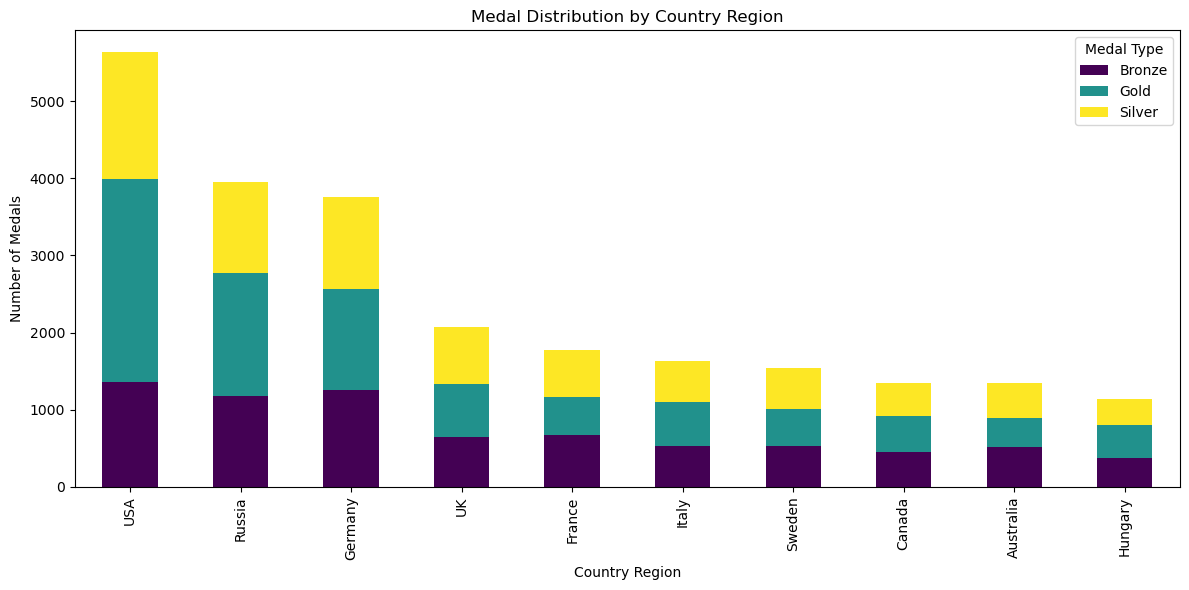

In [33]:
# Call the function to plot the medal distribution by country region
plot_medal_distribution_by_country_region(athleteData, top_n=10)


# Visualization through Histograms

**Histogram Plot:**<br>
A histogram is a graphical representation of the distribution of a dataset. It divides the data into "bins" or intervals, counts the number of data points that fall into each bin, and then represents this information as vertical bars. The height of each bar corresponds to the frequency or count of data points in that bin.
Histograms are used to understand the underlying data distribution and to visualize the frequency or probability distribution of continuous or discrete data.


**Function's Purpose and Histogram Plot:**<br>
The function plot_age_distribution utilizes a histogram plot to display the age distribution of Olympic athletes.It's employed to show the frequency or count of athletes within different age groups. In this case, the data is grouped into "bins" representing specific age ranges (e.g., 20-24, 25-29, 30-34, etc.).
The histogram is ideal for revealing patterns in the age distribution, such as identifying peaks, modes, or variations in the dataset.
By using a histogram, the function effectively presents the distribution of athletes' ages in a clear and interpretable manner.


**Insights and Sample Run:**<br>
In a sample run using your dataset, it was found that the majority of athletes were in the age group of 20, which indicates a strong representation of young athletes. Additionally, there were substantial numbers of athletes under the age of 18.
The visualization also showed that there were relatively fewer athletes in the age group of 50 and above, suggesting a lower presence of older athletes in the dataset.
Overall, the histogram provides insights into the age demographics of Olympic athletes, including the prevalence of younger participants and the distribution of athletes across different age ranges.

In [34]:
def plot_age_distribution(athleteData, bins=20):
    """
    Plot the age distribution of Olympic athletes.

    Args:
        athleteData (pd.DataFrame): The Olympic athlete dataset with age information.
        bins (int): Number of bins to use in the histogram.

    Returns:
        None (displays the age distribution histogram).
    """
    # Filter out missing or invalid age values
    valid_ages = athleteData['Age'].dropna()

    # Create a histogram of athlete ages
    plt.figure(figsize=(10, 6))
    plt.hist(valid_ages, bins=bins, edgecolor='black', alpha=0.7, color='orange')
    
    # Set labels and title
    plt.xlabel('Age')
    plt.ylabel('Number of Athletes')
    plt.title('Age Distribution of Olympic Athletes')

    # Show the plot
    plt.show()




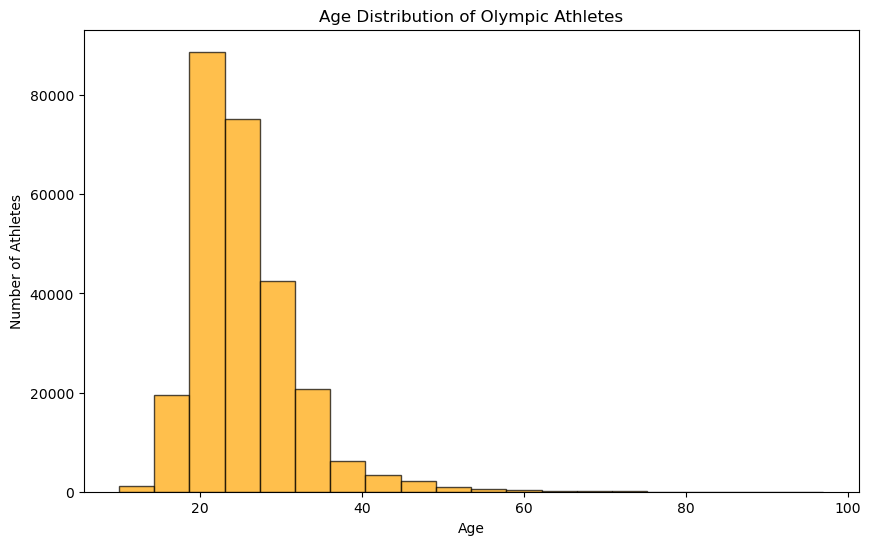

In [35]:
# Call the function to plot the age distribution
plot_age_distribution(athleteData)